In [2]:
import numpy as np

In [4]:
np.__version__

AttributeError: module 'numpy' has no attribute '__version__'

In [1]:
%matplotlib inline

AttributeError: module 'numpy' has no attribute '__version__'


# Gaussian Mixture Model Selection


This example shows that model selection can be performed with
Gaussian Mixture Models using information-theoretic criteria (BIC).
Model selection concerns both the covariance type
and the number of components in the model.
In that case, AIC also provides the right result (not shown to save time),
but BIC is better suited if the problem is to identify the right model.
Unlike Bayesian procedures, such inferences are prior-free.

In that case, the model with 2 components and full covariance
(which corresponds to the true generative model) is selected.



Automatically created module for IPython interactive environment


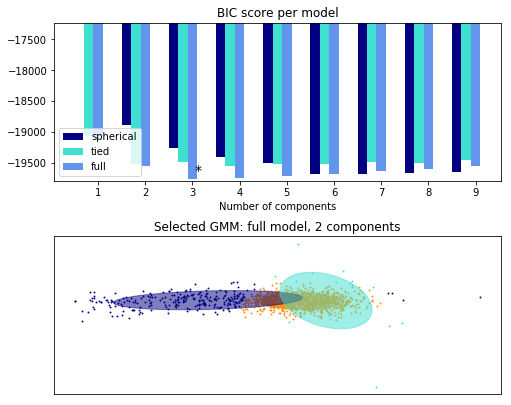

In [11]:
import numpy as np
import itertools

from scipy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

dataset = 'pp'

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
X = loadmat('2'+dataset)['Z']


lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [5]:
cov

array([4.72070197e-05, 1.08084519e-05])

In [6]:
clf

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
clf.covariances_

array([[4.72070197e-05, 1.08084519e-05],
       [2.78784575e-05, 1.33988673e-05],
       [1.31601776e-04, 1.16281737e-04],
       [6.77630201e-05, 1.14649408e-05]])

In [53]:
X1.shape

(1360, 5)

In [59]:
np.mean(X1,0)

array([0.04806756, 0.07708995, 0.109413  , 0.03048485, 0.02916477,
       0.06170672, 0.01908362, 0.0326119 , 0.04707198, 0.07953554])

In [60]:
np.std(X1,0)

array([0.00444034, 0.00495756, 0.00579091, 0.00855756, 0.00313403,
       0.00444849, 0.00641385, 0.00287838, 0.00641616, 0.00537903])

In [62]:
np.mean(X1,0)/np.std(X1,0)

array([11.12913408, 15.85386286, 19.53213335,  3.57681024,  9.63374466,
       13.87140155,  2.97537806, 11.32993276,  7.33647112, 14.78622474])

In [66]:
ind = np.argsort(np.std(X1,0))

In [67]:
ind

array([7, 4, 0, 5, 1, 9, 2, 6, 8, 3])

MovieWriter ffmpeg unavailable. Trying to use html instead.


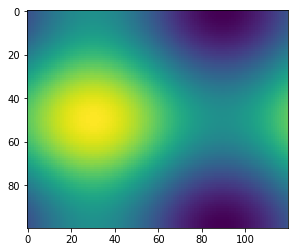

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_images.html')

plt.show()

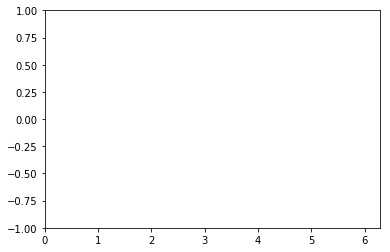

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [110]:
ims

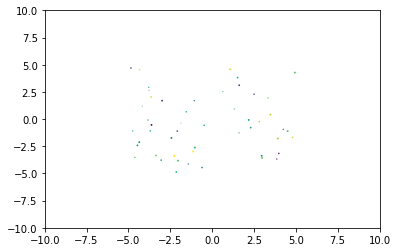

In [114]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream)
        self.scat = self.ax.scatter(x, y, c=c, s=s, animated=True)
        self.ax.axis([-10, 10, -10, 10])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        data = np.random.random((4, self.numpoints))
        xy = data[:2, :]
        s, c = data[2:, :]
        xy -= 0.5
        xy *= 10
        while True:
            xy += 0.03 * (np.random.random((2, self.numpoints)) - 0.5)
            s += 0.05 * (np.random.random(self.numpoints) - 0.5)
            c += 0.02 * (np.random.random(self.numpoints) - 0.5)
            yield data

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:2, :])
        # Set sizes...
        self.scat._sizes = 300 * abs(data[2])**1.5 + 100
        # Set colors..
        self.scat.set_array(data[3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def show(self):
        plt.show()

if __name__ == '__main__':
    a = AnimatedScatter()
    a.show()

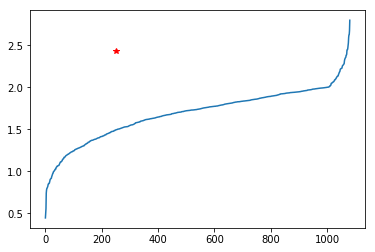

In [92]:
plt.figure()
robust_mahal2.sort()
plt.plot(robust_mahal2)
plt.plot(250,robust_mahal2.max()*.87,'r*')

In [129]:
label_true = loadmat('2'+dataset+'_mask')['BW'] 
a = label_true==1

In [130]:
X[[i for i, x in enumerate(a) if x],:]

array([[-7.83411847e-03,  3.47943573e-03],
       [-1.68191468e-02,  3.81078370e-03],
       [-1.43660056e-02,  4.11715326e-03],
       [-6.32381515e-03, -2.09535946e-03],
       [ 9.94941532e-04, -2.46569978e-04],
       [ 1.07862393e-02,  4.05091528e-03],
       [-1.72272685e-02,  1.25197588e-03],
       [-2.26052547e-02,  2.53036834e-03],
       [-2.12993453e-02, -1.79569256e-03],
       [-1.86016268e-02,  1.43474718e-03],
       [-6.41192460e-03, -2.41310461e-03],
       [-1.18761611e-02, -2.94378985e-03],
       [-8.08557380e-03, -7.00111636e-04],
       [ 6.41733348e-04,  2.31350417e-03],
       [ 5.10814413e-03,  1.83499130e-03],
       [-9.56308186e-03,  8.45615022e-04],
       [-3.13278322e-02,  1.80617428e-03],
       [-2.93093785e-02,  2.58762516e-03],
       [-2.77157309e-02,  5.51262527e-04],
       [-2.15816029e-02,  8.84113101e-04],
       [-1.19189940e-02, -2.35707310e-03],
       [-1.15885156e-02, -2.50207807e-03],
       [-1.22602126e-02, -1.51164803e-03],
       [-1.

In [127]:
label_true.shape

(1360, 1)

In [128]:
label_true==1

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])